In [1]:
%matplotlib notebook
import cmath
from functools import reduce

import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append('..')

from indra.common import Circle
from indra.mobius import MobiusTransformation as Mobius
from indra.plotting import plot_tiles, plot_limit_points, plot_limit_curve

## Kissing Schottky groups

In [2]:
def kissing_schottky(y, v):
    """Return generators and circles for symmetric kissing Schottky group"""
    assert np.isreal(y) and np.isreal(v)
    x = np.sqrt(1 + y**2)
    u = np.sqrt(1 + v**2)
    yv = y * v
    k = 1 / yv - np.sqrt(1 / yv**2 - 1)
    assert abs(k) < 1 or np.isclose(abs(k), 1)
    
    a = Mobius(u, 1j*k*v, -1j*v/k, u)
    b = Mobius(x, y, y, x)
    A = a.inv()
    B = b.inv()
    
    assert np.isclose(b(a(B(A))).M.trace(), -2)
    
    C_a = Circle(complex(0, k*u/v), k/v)
    C_A = Circle(complex(0, -k*u/v), k/v)
    C_b = Circle(complex(-x/y, 0), 1/y)
    C_B = Circle(complex(x/y, 0), 1/y)
    
    return [a, b, A, B], [C_a, C_b, C_A, C_B]

In [3]:
gens, circs = kissing_schottky(1.5, 0.2)
fps = [T.sink() for T in gens]

<IPython.core.display.Javascript object>


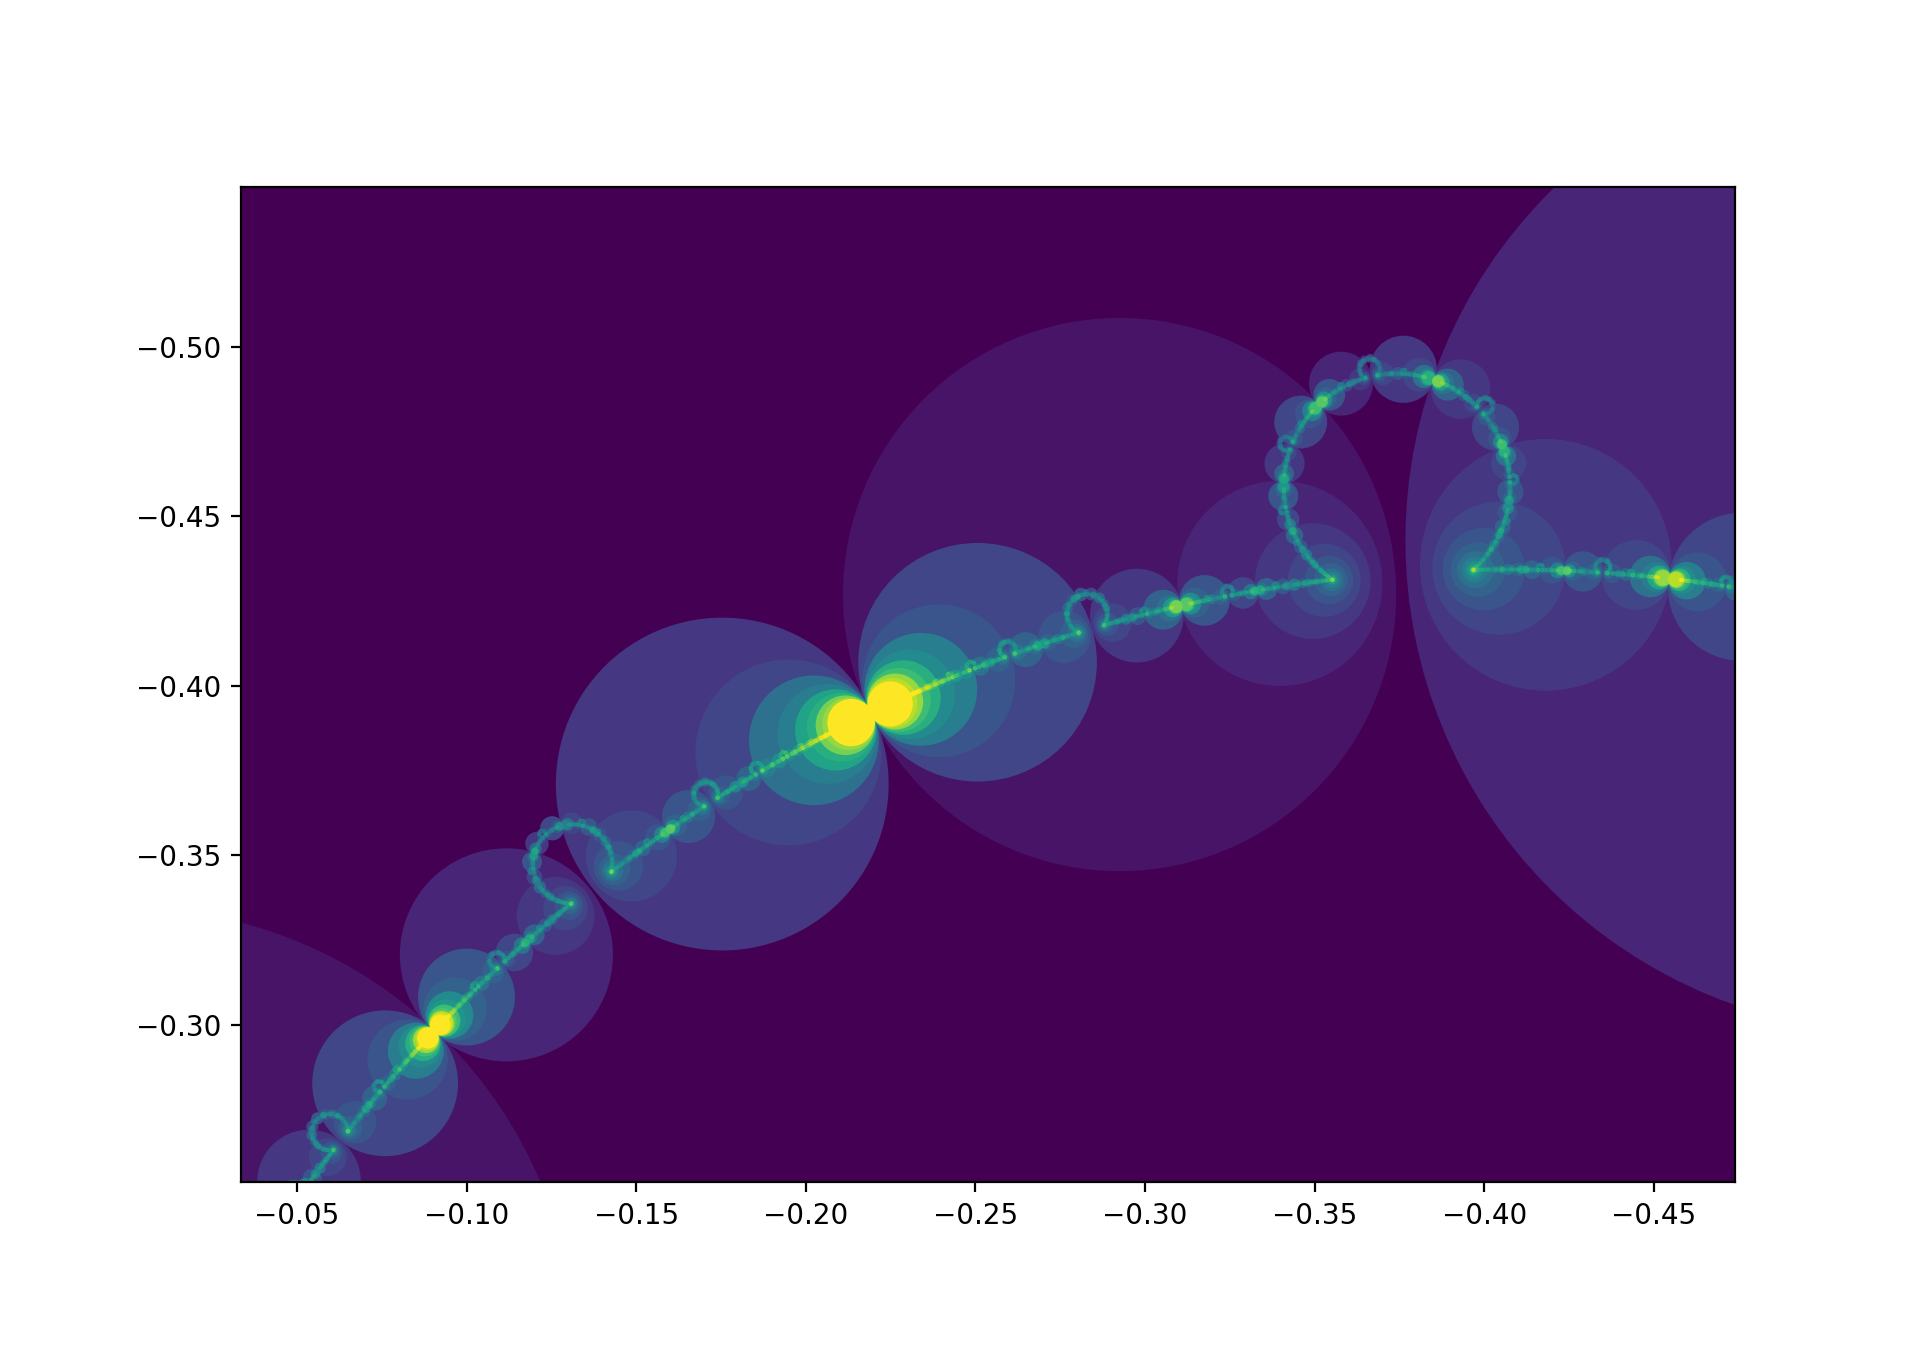

In [4]:
plot_tiles(gens, circs)

<IPython.core.display.Javascript object>


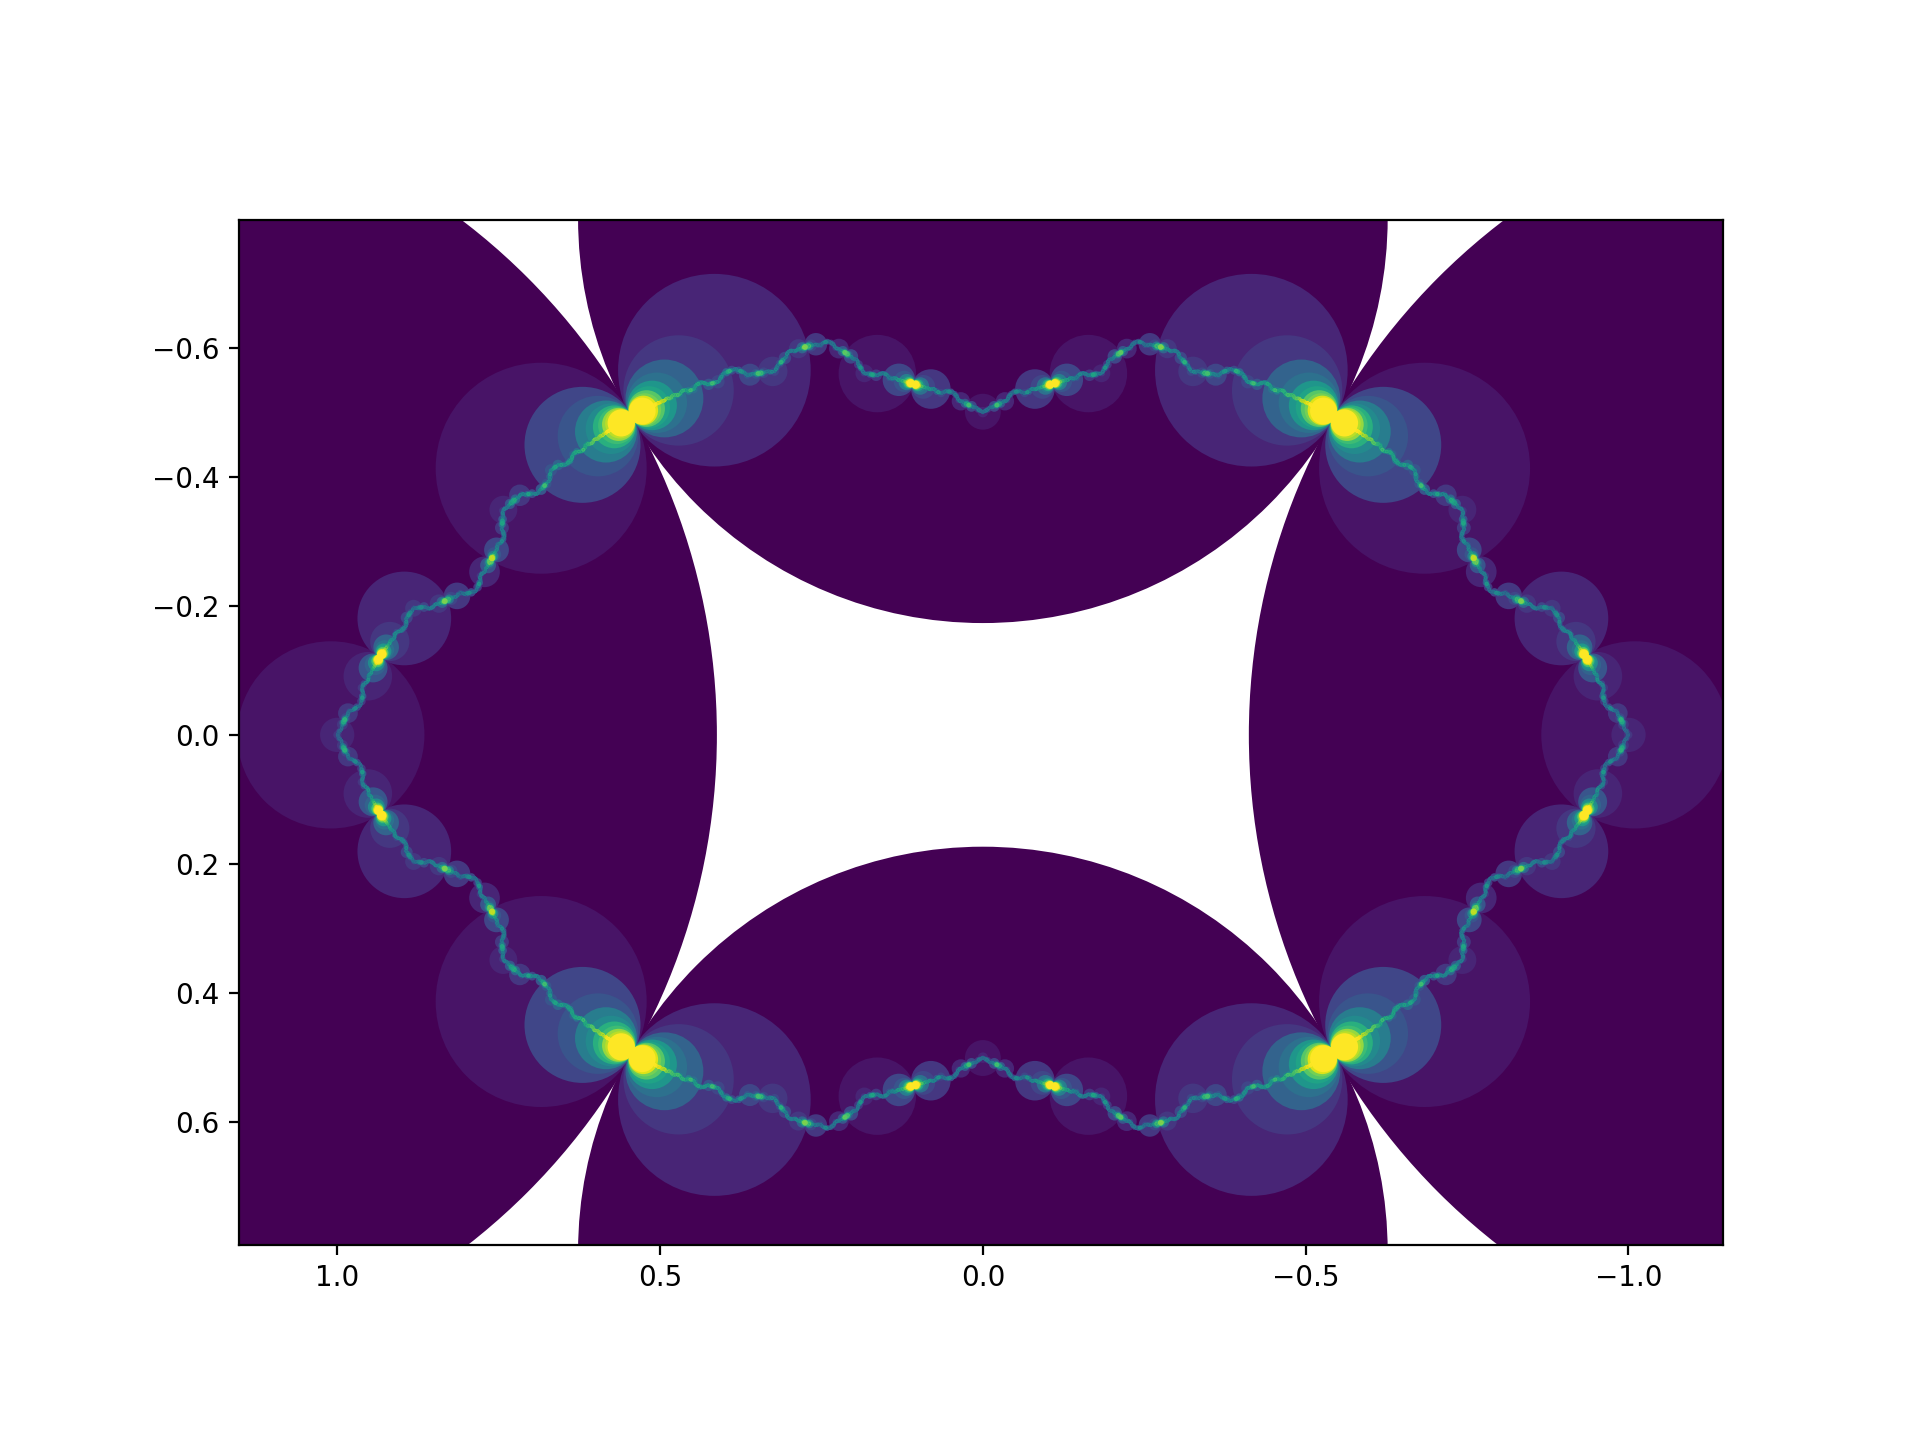

In [12]:
gens1, circs1 = kissing_schottky(1, 0.8)
plot_tiles(gens1, circs1)

<IPython.core.display.Javascript object>


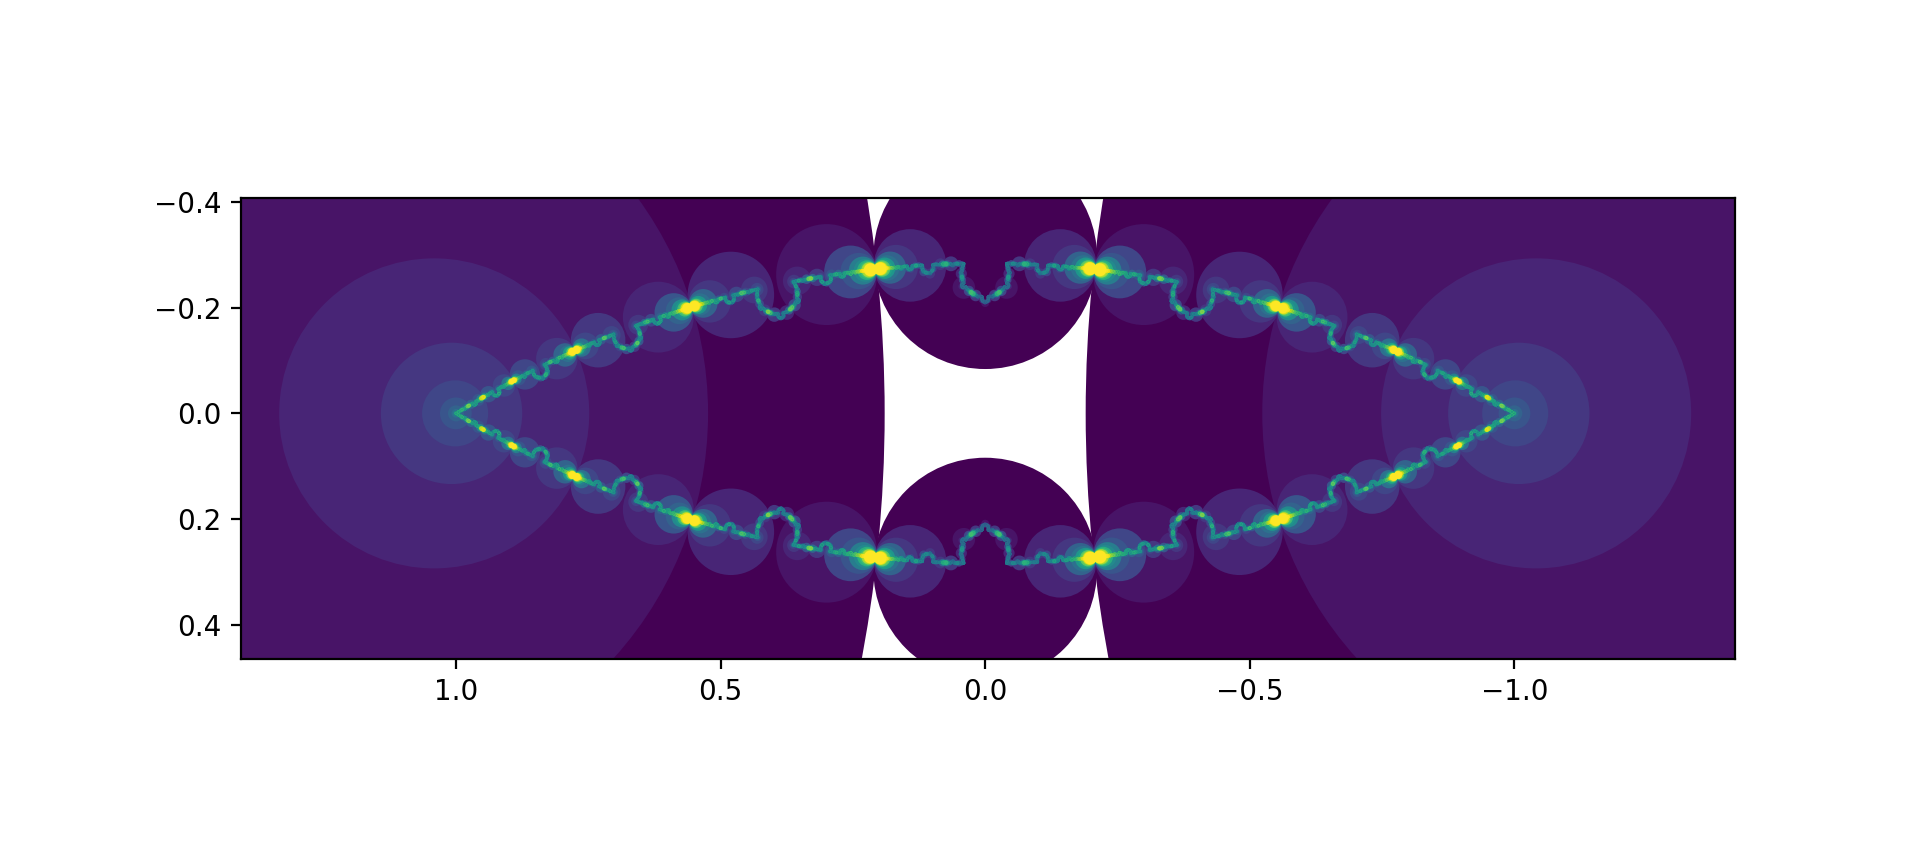

In [13]:
gens2, circs2 = kissing_schottky(0.4, 1)
plot_tiles(gens2, circs2)

## Updating limit point plotting for curves

<IPython.core.display.Javascript object>


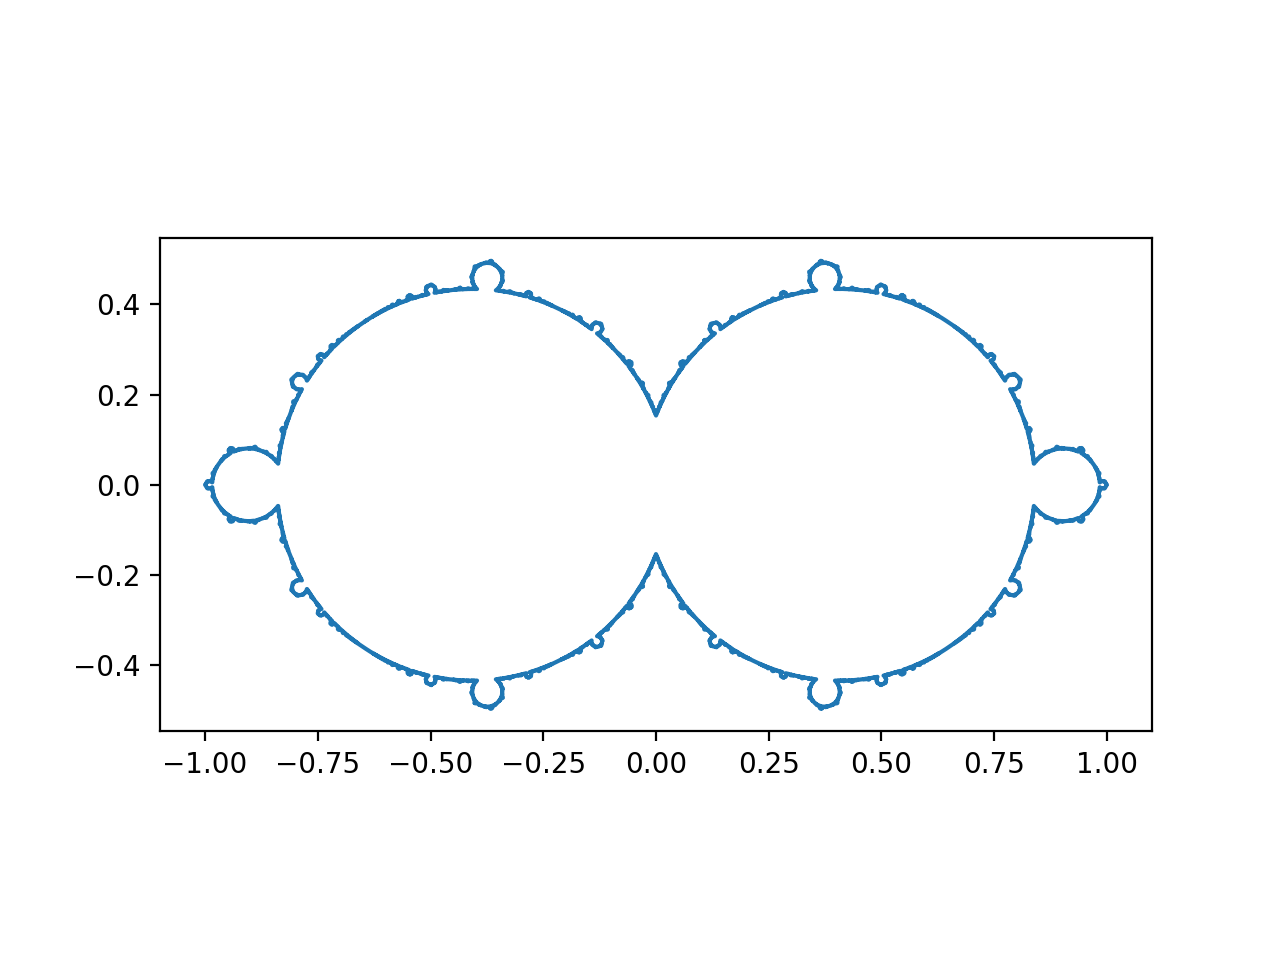

In [4]:
plot_limit_curve(gens, circs)

<IPython.core.display.Javascript object>


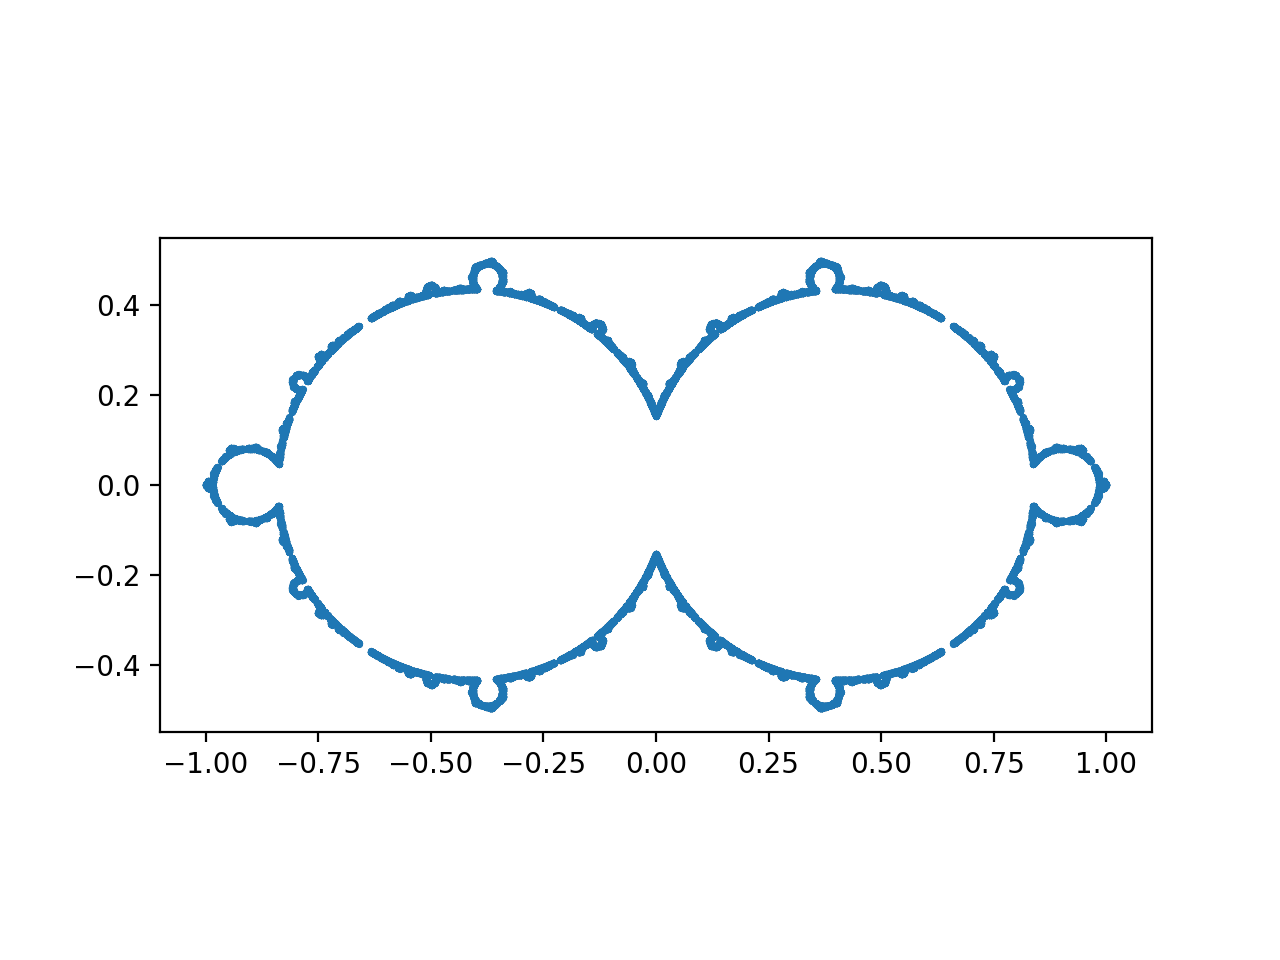

In [5]:
plot_limit_points(gens, circs)